In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
data = pd.read_csv('2015.csv')
data2 = pd.read_csv('2016.csv')
data3 = pd.read_csv('2017.csv')


In [2]:
# data.append(data2, ignore_index = True)
# data.append(data3, ignore_index = True)
data.drop(['Happiness Rank','Country','Region','Standard Error'], axis = 1, inplace = True)
data.iloc[0]

Happiness Score                  7.58700
Economy (GDP per Capita)         1.39651
Family                           1.34951
Health (Life Expectancy)         0.94143
Freedom                          0.66557
Trust (Government Corruption)    0.41978
Generosity                       0.29678
Dystopia Residual                2.51738
Name: 0, dtype: float64

In [3]:
data2.drop(['Happiness Rank','Country','Region','Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1, inplace = True)
data2.iloc[0]

Happiness Score                  7.52600
Economy (GDP per Capita)         1.44178
Family                           1.16374
Health (Life Expectancy)         0.79504
Freedom                          0.57941
Trust (Government Corruption)    0.44453
Generosity                       0.36171
Dystopia Residual                2.73939
Name: 0, dtype: float64

In [4]:
data3.drop(['Happiness.Rank','Country','Whisker.high', 'Whisker.low'], axis = 1, inplace = True)
data3.iloc[0]

Happiness.Score                  7.537000
Economy..GDP.per.Capita.         1.616463
Family                           1.533524
Health..Life.Expectancy.         0.796667
Freedom                          0.635423
Generosity                       0.362012
Trust..Government.Corruption.    0.315964
Dystopia.Residual                2.277027
Name: 0, dtype: float64

In [5]:
len(data3)

155

In [6]:
data.columns = ['Happiness Score','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia']
data2.columns = ['Happiness Score','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia']
data3.columns = ['Happiness Score','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia']

data = data.append(data2)
print(len(data))
data = data.append(data3)
print(len(data))

315
470


In [7]:
data.head()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
data_13 = data.iloc[:,0:4]
data_13.head()
data_22 = data.iloc[:,[0,1,2]]
data_22.head()
data_32 = data.iloc[:,[0,6,7]]
data_32.head()
data_47 = data.iloc[:,0:7]
data_47.head()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
features_13 = data_13.drop(['Happiness Score'], axis = 1)
features_22 = data_22.drop(['Happiness Score'], axis = 1)
features_32 = data_32.drop(['Happiness Score'], axis = 1)
features_47 = data_47.drop(['Happiness Score'], axis = 1)
target = data['Happiness Score']


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg_13 = LinearRegression().fit(features_13, target)

y_pred_13 = reg_13.predict(features_13)
mean_squared_error(target, y_pred_13)

0.38313241487431293

In [11]:
reg_22 = LinearRegression().fit(features_22, target)

y_pred_22 = reg_22.predict(features_22)
mean_squared_error(target, y_pred_22)

0.4328876930949258

In [12]:
reg_32 = LinearRegression().fit(features_32, target)

y_pred_32 = reg_32.predict(features_32)
mean_squared_error(target, y_pred_32)

0.9297629730704532

In [13]:
reg_47 = LinearRegression().fit(features_47, target)

y_pred_47 = reg_47.predict(features_47)
mean_squared_error(target, y_pred_47)

0.30197336216035153

In [14]:
# MLP model
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100),max_iter=200000)

In [15]:
#Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended we scale our data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_13)
# Now apply the transformations to the data:
mlp_features_13 = scaler.transform(features_13)
mlp.fit(mlp_features_13, target)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
mlp_pred_13 = mlp.predict(mlp_features_13)
mean_squared_error(target, mlp_pred_13)

0.3471962423122151

In [17]:
scaler.fit(features_22)
# Now apply the transformations to the data:
mlp_features_22 = scaler.transform(features_22)
mlp.fit(mlp_features_22, target)
mlp_pred_22 = mlp.predict(mlp_features_22)
mean_squared_error(target, mlp_pred_22)

0.4203499324914386

In [18]:
scaler.fit(features_32)
# Now apply the transformations to the data:
mlp_features_32 = scaler.transform(features_32)
mlp.fit(mlp_features_32, target)
mlp_pred_32 = mlp.predict(mlp_features_32)
mean_squared_error(target, mlp_pred_32)

0.8662719210957905

In [19]:
scaler.fit(features_47)
# Now apply the transformations to the data:
mlp_features_47 = scaler.transform(features_47)
mlp.fit(mlp_features_47, target)
mlp_pred_47 = mlp.predict(mlp_features_47)
mean_squared_error(target, mlp_pred_47)

0.24159208347526187

In [20]:
#Plotting training and predicted target values for 2 features selected using Linear Regression model
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

z = target
z1 = y_pred_22
x = data.iloc[:,1]
y = data.iloc[:,2]

ax.plot(x, y, z,'r', label='Original target values')
ax.plot(x, y, z1,'b', label='Predicted target values')
ax.legend()
plt.xlabel('Economy')
plt.ylabel('Family')
plt.title('Linear Regression plot')

plt.show()

<Figure size 2000x1000 with 1 Axes>

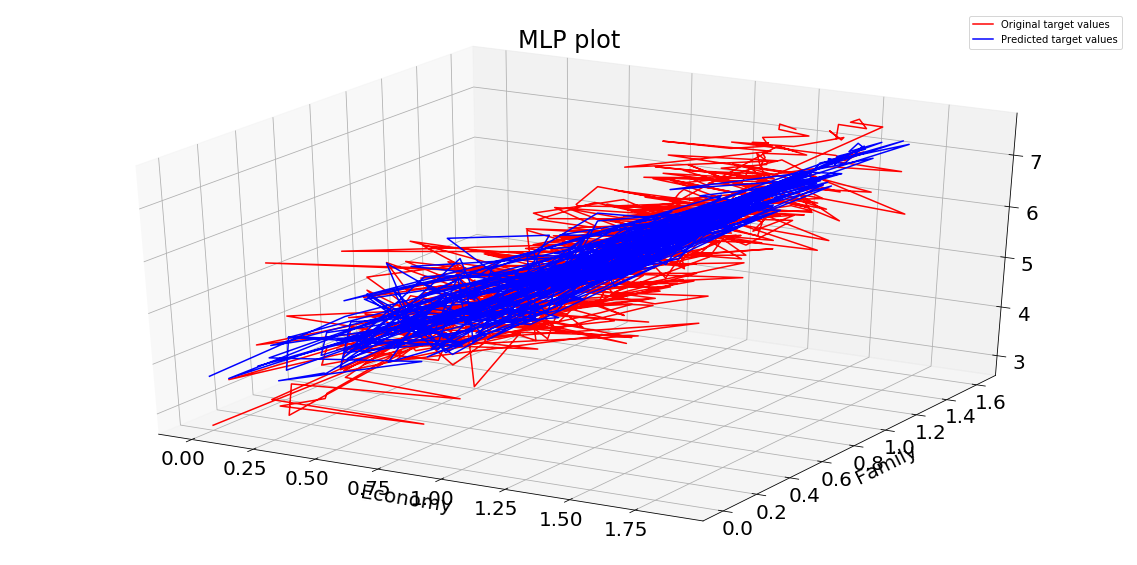

In [21]:
#Plotting training and predicted target values for 2 features selected using MLP model
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

z = target
z1 = mlp_pred_22
x = data.iloc[:,1]
y = data.iloc[:,2]

ax.plot(x, y, z,'r', label='Original target values')
ax.plot(x, y, z1,'b', label='Predicted target values')
ax.legend()
plt.xlabel('Economy')
plt.ylabel('Family')
plt.title('MLP plot')

plt.show()

## Distribution plot between train data and predicted data

C:\Users\olesc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


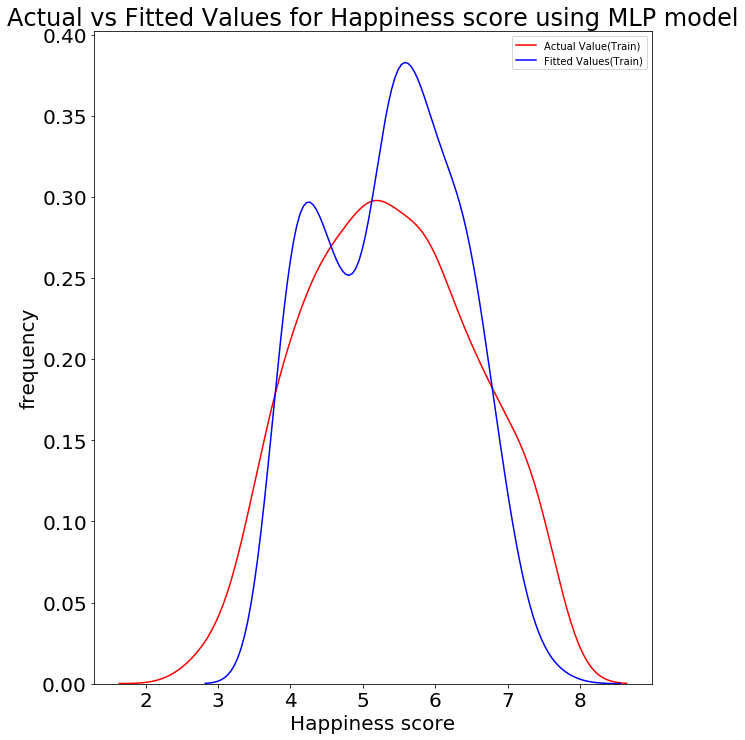

In [22]:
import seaborn as sns
plt.figure(figsize=(10, 12))
ax1 = sns.distplot(z, hist=False, color="r", label="Actual Value(Train)")
sns.distplot(z1, hist=False, color="b", label="Fitted Values(Train)" , ax=ax1)
plt.title('Actual vs Fitted Values for Happiness score using MLP model')
plt.xlabel('Happiness score')
plt.ylabel('frequency')
plt.show()
plt.close()

C:\Users\olesc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


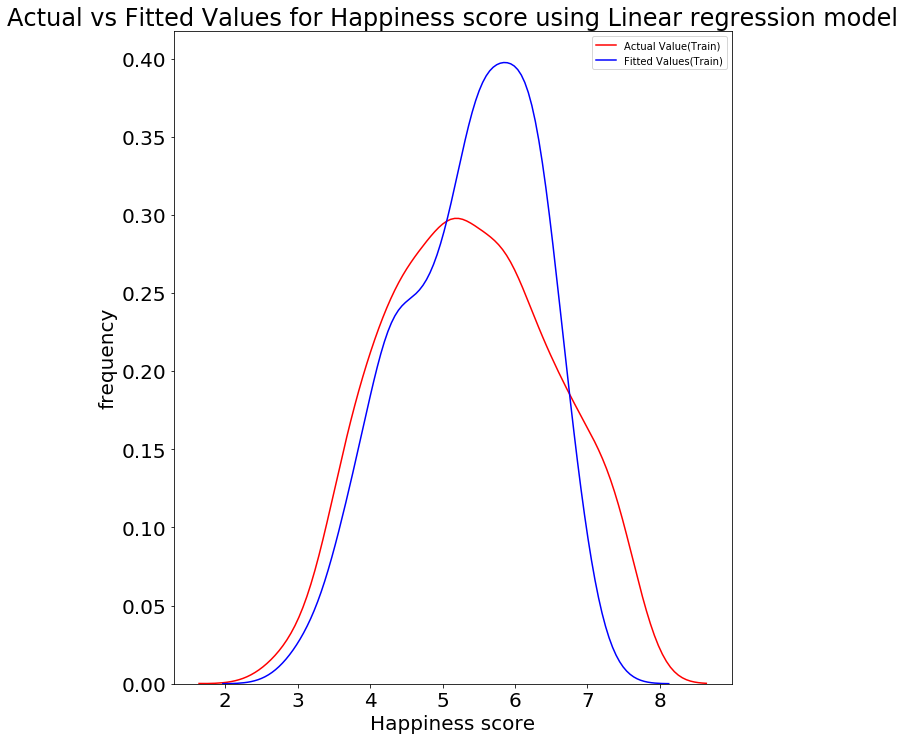

In [23]:
import seaborn as sns
plt.figure(figsize=(10, 12))
ax1 = sns.distplot(target, hist=False, color="r", label="Actual Value(Train)")
sns.distplot(y_pred_22, hist=False, color="b", label="Fitted Values(Train)" , ax=ax1)
plt.title('Actual vs Fitted Values for Happiness score using Linear regression model')
plt.xlabel('Happiness score')
plt.ylabel('frequency')
plt.show()
plt.close()

In [24]:
target = data.iloc[:,0]
features = data.iloc[:,1:]
print(target.head())
features.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64


,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [25]:
reg = LinearRegression().fit(features, target)
y_pred = reg.predict(features)
mean_squared_error(target, y_pred)

8.186944509182294e-08

In [26]:
mlp = MLPRegressor(hidden_layer_sizes=(100),max_iter=200000)
scaler = StandardScaler()
scaler.fit(features)
# Now apply the transformations to the data:
mlp_features = scaler.transform(features)
mlp.fit(mlp_features, target)
mlp_pred = mlp.predict(mlp_features)
mean_squared_error(target, mlp_pred)

0.02195097920297613

C:\Users\olesc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


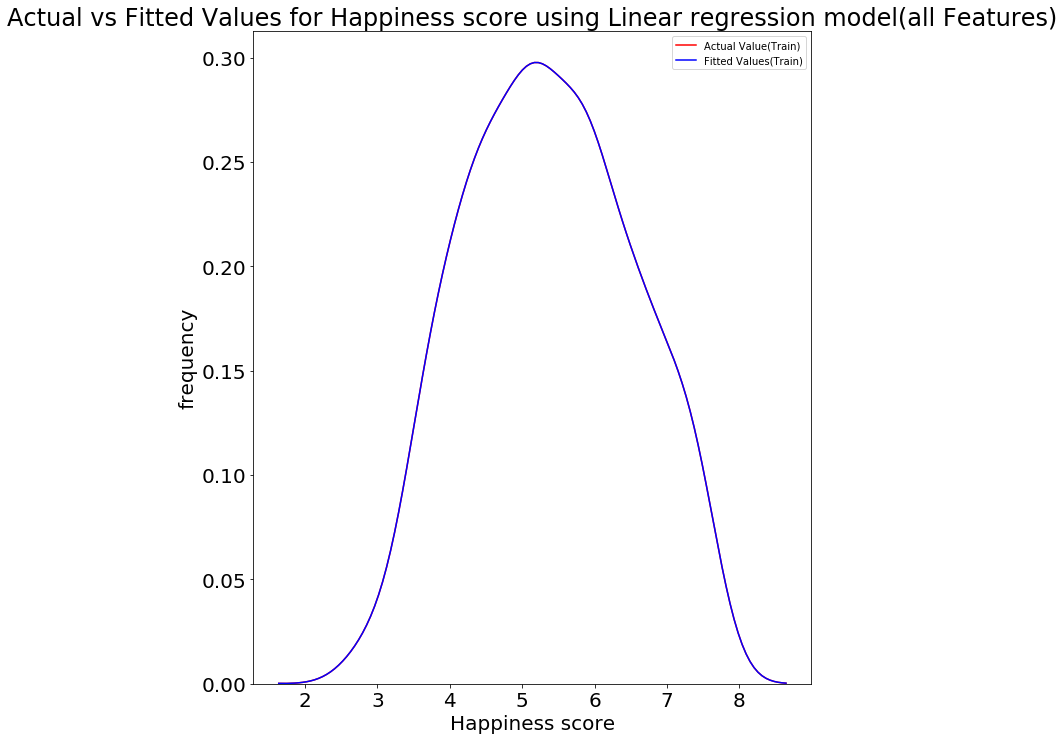

In [27]:
plt.figure(figsize=(10, 12))
ax1 = sns.distplot(target, hist=False, color="r", label="Actual Value(Train)")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values(Train)" , ax=ax1)
plt.title('Actual vs Fitted Values for Happiness score using Linear regression model(all Features)')
plt.xlabel('Happiness score')
plt.ylabel('frequency')
plt.show()
plt.close()

C:\Users\olesc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


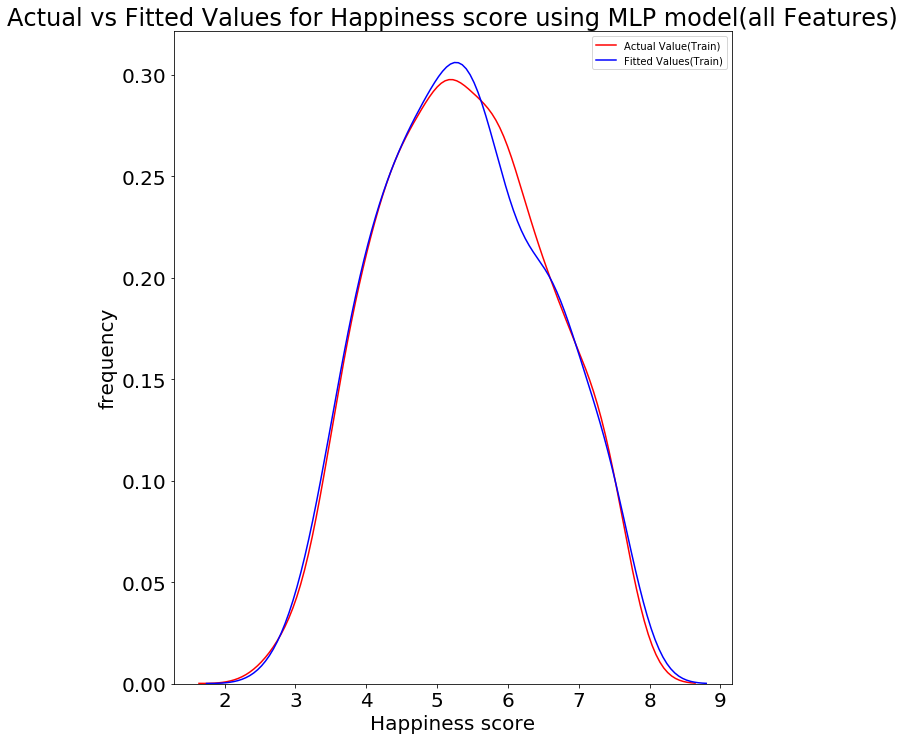

In [28]:
plt.figure(figsize=(10, 12))
ax1 = sns.distplot(target, hist=False, color="r", label="Actual Value(Train)")
sns.distplot(mlp_pred, hist=False, color="b", label="Fitted Values(Train)" , ax=ax1)
plt.title('Actual vs Fitted Values for Happiness score using MLP model(all Features)')
plt.xlabel('Happiness score')
plt.ylabel('frequency')
plt.show()
plt.close()

In [29]:
#Assignment 4: Olesch
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)
#print(features)

In [30]:
# Now apply the transformations to the data:
#features = scaler.transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)

mlp = MLPRegressor(hidden_layer_sizes=(10,10),max_iter=300)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mean_squared_error(y_test, mlp_pred)


C:\Users\olesc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.4674201549787408

[0.020537446186886285, 0.09390568277309741, 0.06234136542524236, 0.10671177117566338, 0.11219554880842011, 0.06493783371442374, 0.09373768094944346, 0.11489270236852576, 0.10072115541229089, 0.060582166205381524, 0.07784833219108936, 0.08149322095536814, 0.09047107332545366, 0.08240288747988302, 0.07414695232418748, 0.08109669235932364, 0.08468547477865285, 0.06075751340645116, 0.06636637564997692, 0.0676981728838184, 0.08449832336529955, 0.05301115604497169, 0.05643454654998446, 0.05287638282135225, 0.05513319607287873, 0.047075100346184603, 0.07911286239934845, 0.06613307619107799, 0.07624233858957358, 0.054370648479046005, 0.0678166873191201, 0.05849810316816134, 0.05759394336035899, 0.05136644633413334, 0.04620505969442517, 0.04930638171336889, 0.06730383137984047, 0.053432053668478696, 0.05685764143801959, 0.047554521330573536, 0.05358688545571252, 0.04731488987015413, 0.04128712110967777, 0.04822128715163008, 0.05328340277533494, 0.05937782749459939, 0.0535966338991298, 0.0410777

([<matplotlib.axis.XTick at 0x29aced61fd0>,
 <a list of 49 Text xticklabel objects>)

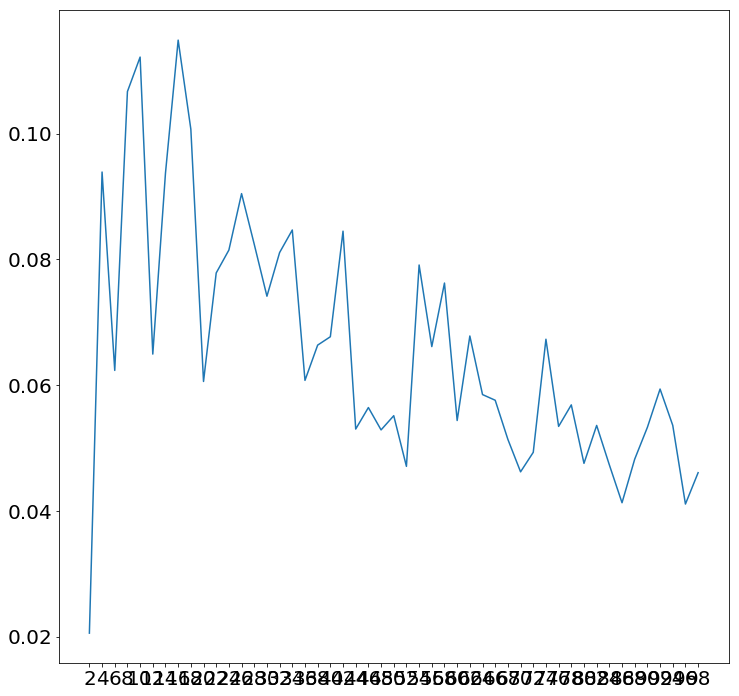

In [33]:
h_layers = [x for x in range(5,80,5)]
result = []
#result2 = []
for i in h_layers:
    mlp = MLPRegressor(hidden_layer_sizes=(i),max_iter=3000, random_state=12)
    mlp.fit(X_train, y_train)
    mlp_pred = mlp.predict(X_test)
    result.append(mean_squared_error(y_test, mlp_pred))
print(result)

plt.figure(figsize=(12, 12))
plt.plot(h_layers, result)
plt.xticks(h_layers)


[0.4292727116990395, 0.6676345736410889, 0.781478141331099, 0.7103246773761043, 0.6999876961721045, 0.7524149677803572, 0.6940740723089105, 0.8492219456279722, 0.8384949136284828, 0.7631306413410335, 0.6953331439591729, 0.7289466848768312, 0.6703797984346767, 0.735366860945229, 0.6877784570624672, 0.7870237169242833, 0.7095039606963837, 0.6116888979195702, 0.6833132622372277, 0.679171214240633, 0.7118487114818202, 0.7100897407258265, 0.7287003232102798, 0.7295352771833588, 0.6476627931954151, 0.6467299303036176, 0.8043006445352293, 0.5835342577454752, 0.6924438121507576, 0.6184494924723439, 0.6329619234333025, 0.6519521816338849, 0.6236380129892739, 0.5675782514362937, 0.6332525561673178, 0.6929902243629324, 0.7008456647829562, 0.7148713685871461, 0.6717694388044344, 0.6897615079057992, 0.6783784034391509, 0.5588081330128921, 0.6157972707966268, 0.7254387976176209, 0.6953404354312424, 0.5940085203265847, 0.6067821080822232, 0.6380929240919306, 0.6791631943574878]


([<matplotlib.axis.XTick at 0x29ad1453470>,
 <a list of 49 Text xticklabel objects>)

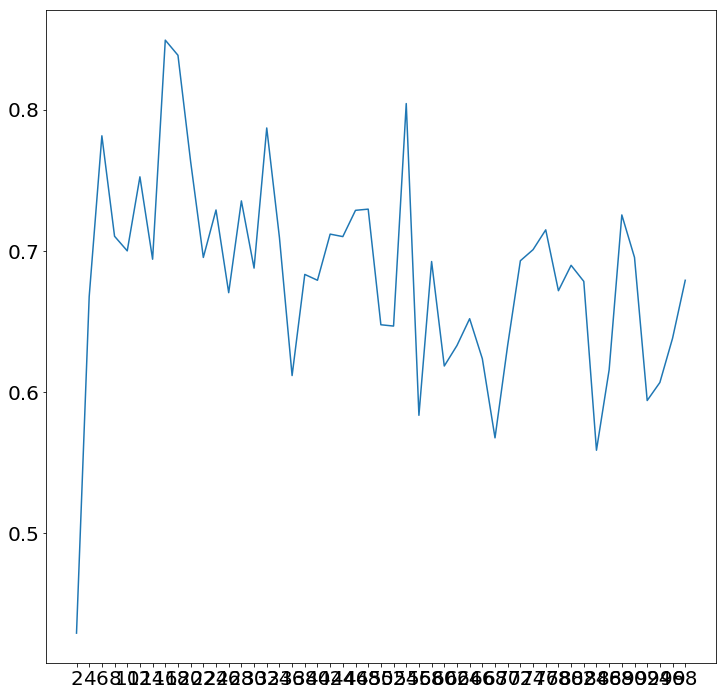

In [34]:
h_layers = [x for x in range(5,80,5)]
result2 = []
for i in h_layers:
    rmse_val = 0
    mlp2 = MLPRegressor(hidden_layer_sizes=(i),max_iter=3000, random_state=12)
    scores = np.sum(-cross_val_score(mlp2, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
    #print("Mean Accuracy: %0.2f".format(scores.mean()))
    rmse_val = np.sqrt(scores)
    #print("Root mean sqaure error: %0.2f".format(scores.mean()))
    #result2.append(scores.mean())
    result2.append(rmse_val)
print(result2)

plt.figure(figsize=(12, 12))
plt.plot(h_layers, result2)
plt.xticks(h_layers)
